In [2]:
print("hello")

hello


In [1]:
print("meowmeow")

print("hello?")

print("hehehaha")

meowmeow
hello?
hehehaha


In [3]:
print("kaiyi test")

print("weeeeeee")
print("weyuwuye")

kaiyi test
weeeeeee
weyuwuye


In [12]:
import cv2  # For image loading and processing
import os  # For handling file paths
import numpy as np  # For numerical operations
from PIL import Image, ImageEnhance  # For image loading and augmentation
import matplotlib.pyplot as plt  # For visualization
from sklearn.preprocessing import LabelEncoder  # For encoding labels
import random  # For random transformations


In [77]:
from PIL import Image, ImageEnhance, ImageFilter

# Function to check if an image is too dark
def check_brightness(img):
    grayscale = img.convert("L")  # Convert to grayscale
    avg_brightness = np.mean(np.array(grayscale))  # Compute mean brightness
    return avg_brightness


def adjust_brightness(img):
    brightness = check_brightness(img)  # Get brightness value
    if brightness < 50:
        factor = 2.5  # Strong increase for very dark images
    elif brightness < 100:
        factor = 1.5  # Moderate increase for slightly dark images
    else:
        return img  # Skip enhancement if already bright

    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(factor)


# Function to resize image
def resize_image(img, target_size=(224, 224)):
    return img.resize(target_size, Image.LANCZOS)

# Function to sharpen image
def sharpen_image(img, radius=2, percent=200, threshold=3):
    return img.filter(ImageFilter.UnsharpMask(radius=radius, percent=percent, threshold=threshold))




In [78]:
# Loading dataset and preprocessing
train_folder = "/Users/siyinggg/Documents/IT1244/Train" #change according to your file
target_size = (224, 224)

train_images = []
train_labels = []

for img_file in os.listdir(train_folder):
    if img_file.endswith(".png") or img_file.endswith(".jpg"):
        img_path = os.path.join(train_folder, img_file)

        # Load image using PIL
        img = Image.open(img_path).convert("RGB")

        # Extract class label from filename
        class_label = int(img_file.split("__")[0])

        # Apply preprocessing
        img = resize_image(img, target_size)  # Resize
        img = adjust_brightness(img)  # Adaptive Brightness Adjustment
        img = sharpen_image(img)  # Sharpen

        # Convert image to NumPy array and normalize
        img = np.array(img) / 255.0  

        # Store
        train_images.append(img)
        train_labels.append(class_label)

# Convert to NumPy arrays
X_train = np.array(train_images)
y_train = np.array(train_labels)

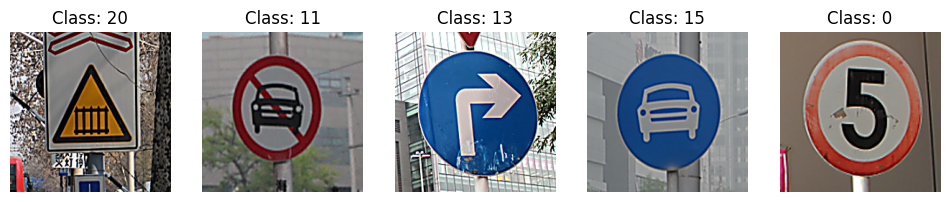

In [123]:
num_samples = 5  # Number of images to display
random_indices = random.sample(range(len(X_train)), num_samples)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_train[idx])  # Show image
    plt.title(f"Class: {y_train[idx]}")
    plt.axis("off")

plt.show()
